In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import numpy as np
plt.style.use('willo')

In [2]:
gang = pd.read_csv('../data/data_big_sep2015/gang_data.csv')
gang['Timestamp']=pd.to_datetime([val.rsplit('-',1)[0] for val in gang['Timestamp']])

In [3]:
n = 0
save_hist = np.zeros((gang['Timestamp'].shape[0],17))
save_hist_pernode = []
stackit = []
runcnt = []
for subgang in gang.filter(regex="proc_run"):
    val = gang[subgang].values
    val[np.isnan(val)]=0.1
    norun = (val==0)
    runl = 0
    for i in norun:
        if(i):
            runl=runl+1
        else:
            if(runl>0):
                runcnt.append(runl)
                runl=0
    select_id=gang[subgang].values.astype(int)
    if(np.max(select_id)<17):
        n = n + 1
        save_hist_pernode.append(np.histogram(select_id,bins=17,range=(0,16))[0])
        stackit.append(val)
        save_hist[  range( save_hist.shape[0] ), select_id ]=save_hist[  range( save_hist.shape[0] ), select_id ]+1

save_hist = save_hist/n
save_hist_pernode = np.array(save_hist_pernode)/float(gang['Timestamp'].shape[0])

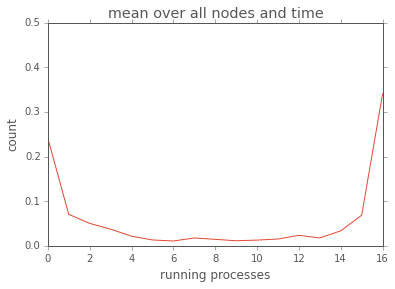

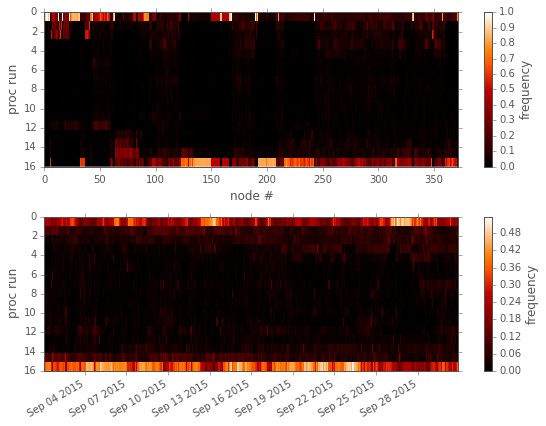

In [4]:
plt.figure()
plt.plot(range(17),np.mean(save_hist,axis=0))
plt.ylabel('count')
plt.xlabel('running processes')
plt.title('mean over all nodes and time')
plt.ylim([0,0.5])
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(212)
x_lims = mdates.date2num(gang['Timestamp'].astype(object))
plt.imshow(save_hist.T,aspect='auto',interpolation='none',cmap='gist_heat',extent=[x_lims[0],x_lims[-1],16,0])
cb=plt.colorbar()
cb.set_label('frequency')
ax.xaxis_date()
fig.autofmt_xdate()
plt.ylabel('proc run')
plt.subplot(211)
plt.imshow(save_hist_pernode.T,aspect='auto',interpolation='none',cmap='gist_heat',extent=[0,save_hist_pernode.shape[0],16,0])
cb=plt.colorbar()
cb.set_label('frequency')
plt.xlabel('node #')
plt.ylabel('proc run')
fig.tight_layout()
fig.savefig("../figures/usage_hist.png",dpi=200)

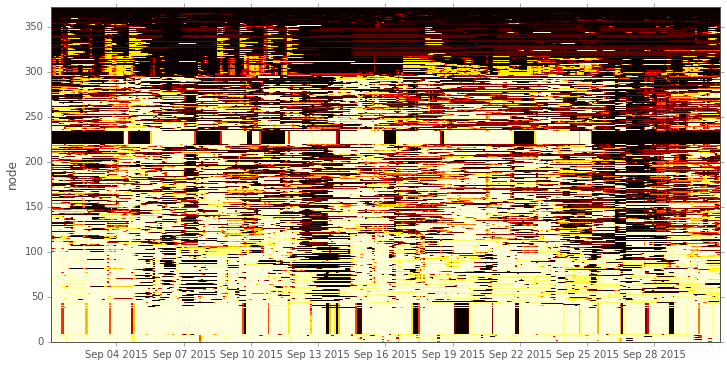

In [5]:
plt.style.use('willo')
fig = plt.figure(figsize=(12,6))
mymean = np.mean(stackit,axis=1)
indices = np.argsort(mymean)
stackit=np.array(stackit)
x_lims = mdates.date2num(gang['Timestamp'].astype(object))
plt.imshow(stackit[indices,:],aspect='auto',interpolation='none',cmap='hot',extent=[x_lims[0],x_lims[-1],0,stackit.shape[0]])
plt.gca().xaxis_date()
plt.ylabel('node')
fig.savefig("../figures/usage_stack.png",dpi=200)

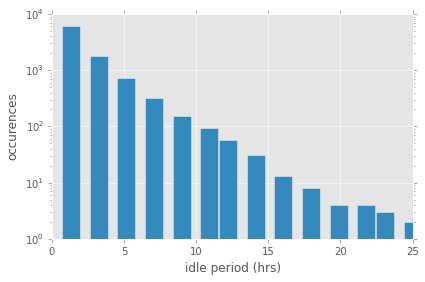

In [6]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(6,4))
runcnt = np.array(runcnt)
tstep = (gang['Timestamp'][1]-gang['Timestamp'][0]).seconds
tmcnt = runcnt*tstep/60/60


hist, bins = np.histogram(tmcnt, bins=50)
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, 1.25, align="center")
plt.yscale('log')
plt.ylabel('occurences')
plt.xlabel('idle period (hrs)')
plt.xlim(0,25)
plt.tight_layout()
fig.savefig("../figures/idle_hist.png",dpi=200)

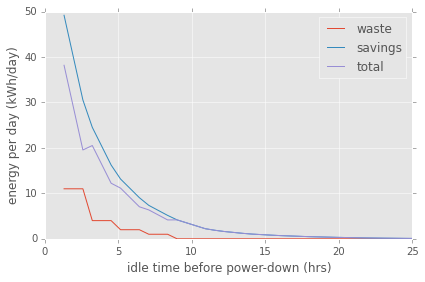

In [7]:
tmsave = []
tmcost = []
for cutoff in center:
    tmsave.append(np.sum(tmcnt[tmcnt>cutoff]-cutoff))
    tmcost.append(np.sum(tmcnt>cutoff)*10/60) #10 minutes for every time a node shutsoff
fig=plt.figure(figsize=(6,4))
save = (np.array(tmsave)-np.array(tmcost))*55/1000/12 #total hours*55W/12 days 
cost = np.array(tmcost)*250/1000/12 #total hours*255W/12 days 
plt.plot(center,cost, label='waste') 
plt.plot(center,save, label='savings') 
plt.plot(center,save-cost, label='total') 
plt.xlabel('idle time before power-down (hrs)')
plt.ylabel('energy per day (kWh/day)')
l=plt.legend()
for text in l.get_texts():
    text.set_color("#555555")
plt.xlim(0,25)
plt.tight_layout()
fig.savefig("../figures/saving.png",dpi=200)

In [8]:
gang['Timestamp'][1]-gang['Timestamp'][0]

Timedelta('0 days 01:50:00')